
# **✈️ Airlines Delay Prediction using ML**
> 📘 Overview

The Airlines Delay Prediction Project is a data science and machine learning project focused on predicting flight delays using only the Airlines dataset. The aim is to analyze how airline-related features (such as distance, departure time, arrival time, or flight duration) contribute to flight delays. The project is implemented entirely in Python using core data science libraries — pandas, numpy, matplotlib, seaborn, and scikit-learn.

| **Feature**             | **Description**                                                           |
| ----------------------- | ------------------------------------------------------------------------- |
| **Airline**             | The carrier or airline operating the flight.                              |
| **Flight**              | Flight number or ID.                                                      |
| **Source_Airport**      | Departure airport.                                                        |
| **Destination_Airport** | Arrival airport.                                                          |
| **Departure_Time**      | Scheduled departure time.                                                 |
| **Arrival_Time**        | Scheduled arrival time.                                                   |
| **Duration**            | Total flight duration.                                                    |
| **Distance**            | Distance between source and destination airports.                         |
| **Delay**               | Target variable — indicates if the flight was delayed (1) or on time (0). |


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from math import radians, sin, cos, asin, sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
from sklearn.decomposition import PCA



# Data Loading
 Imported the Airlines dataset using pandas for analysis and modeling.

In [3]:
airlines = pd.read_csv("Airlines.csv")

print("✅ Dataset loaded successfully!")
print("Shape:", airlines.shape)
print("Columns:", airlines.columns.tolist())
airlines.head()


✅ Dataset loaded successfully!
Shape: (124612, 9)
Columns: ['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'Delay']


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269.0,SFO,IAH,3.0,15.0,205.0,1.0
1,2,US,1558.0,PHX,CLT,3.0,15.0,222.0,1.0
2,3,AA,2400.0,LAX,DFW,3.0,20.0,165.0,1.0
3,4,AA,2466.0,SFO,DFW,3.0,20.0,195.0,1.0
4,5,AS,108.0,ANC,SEA,3.0,30.0,202.0,0.0


In [4]:
airlines.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,124612.000000,124611.000000,124611.000000,124611.000000,124611.000000,124611.000000
mean,64751.059914,2508.891173,3.864739,785.582356,130.655568,0.343533
std,37427.240926,2083.806330,1.932999,274.074905,70.062826,0.474889
min,1.000000,1.000000,1.000000,10.000000,23.000000,0.000000
25%,32296.750000,770.500000,2.000000,550.000000,80.000000,0.000000
50%,64741.500000,1902.000000,4.000000,770.000000,114.000000,0.000000
75%,97197.250000,3855.000000,5.000000,1015.000000,160.000000,1.000000
max,129502.000000,7813.000000,7.000000,1439.000000,655.000000,1.000000


| **Step No.** | **Step Title**                      | **Description of Work Done**                                                                                                       |
| ------------ | ----------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **1**        | **Data Loading**                    | Imported the Airlines dataset using **pandas** for analysis and modeling.                                                          |
| **2**        | **Data Cleaning**                   | Handled missing values, removed duplicates, converted data types, and ensured data consistency.                                    |
| **3**        | **Exploratory Data Analysis (EDA)** | Visualized distributions, delay frequency, and relationships between features using **matplotlib** and **seaborn**.                |
| **4**        | **Feature Engineering**             | Extracted new features (like departure hour, time of day, flight speed), encoded categorical variables, and scaled numerical data. |
| **5**        | **Data Splitting**                  | Split dataset into **training (80%)** and **testing (20%)** sets using **train_test_split** from scikit-learn.                     |
| **6**        | **Model Building**                  | Trained multiple models — **Logistic Regression**, **Decision Tree**, and **Random Forest** — to predict flight delays.            |
| **7**        | **Model Evaluation**                | Evaluated model performance using **Accuracy**, **Precision**, **Recall**, **F1-score**, and **ROC-AUC** metrics.                  |
| **8**        | **Feature Importance Analysis**     | Identified top contributing factors influencing flight delay predictions.                                                          |
| **9**        | **Visualization of Results**        | Plotted confusion matrix, feature importance graph, and delay trends by airline and distance.                                      |
| **10**       | **Model Saving (Optional)**         | Saved the best-performing model using `joblib` or `pickle` for future use or deployment.                                           |


**Important points regarding columns:**

*   The `id` column is just an identifier and is likely not useful for prediction.
*   `Airline`, `AirportFrom`, and `AirportTo` are categorical features and will need to be handled appropriately (e.g., one-hot encoding) for most models.
*   `DayOfWeek`, `Time`, and `Length` are numerical features, but `DayOfWeek` could also be treated as categorical.
*   `Delay` is the binary target variable.

### Data Cleaning

This step involves handling missing values and duplicate entries to ensure the data is clean and ready for analysis.

In [5]:
# Check for missing values
print("Missing values before cleaning:")
print(airlines.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows before cleaning:", airlines.duplicated().sum())

# Drop duplicate rows if any
airlines.drop_duplicates(inplace=True)
print("Number of duplicate rows after cleaning:", airlines.duplicated().sum())

# Handle missing values in 'Length' and 'Delay'
# For 'Length', we can fill missing values with the mean or median. Let's use the mean for now.
airlines['Length'].fillna(airlines['Length'].mean(), inplace=True)

# For 'Delay', since it's the target variable and there's only one missing value,
# we can drop the row or impute it. Given it's a binary variable, dropping is safer.
airlines.dropna(subset=['Delay'], inplace=True)

# Convert 'Delay' to integer type
airlines['Delay'] = airlines['Delay'].astype(int)


# Display info after cleaning
print("\nInfo after cleaning:")
airlines.info()
airlines.head()

Missing values before cleaning:
id             0
Airline        1
Flight         1
AirportFrom    1
AirportTo      1
DayOfWeek      1
Time           1
Length         1
Delay          1
dtype: int64

Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0

Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 124611 entries, 0 to 124610
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           124611 non-null  int64  
 1   Airline      124611 non-null  object 
 2   Flight       124611 non-null  float64
 3   AirportFrom  124611 non-null  object 
 4   AirportTo    124611 non-null  object 
 5   DayOfWeek    124611 non-null  float64
 6   Time         124611 non-null  float64
 7   Length       124611 non-null  float64
 8   Delay        124611 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 9.5+ MB


/tmp/ipython-input-230538925.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airlines['Length'].fillna(airlines['Length'].mean(), inplace=True)


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269.0,SFO,IAH,3.0,15.0,205.0,1
1,2,US,1558.0,PHX,CLT,3.0,15.0,222.0,1
2,3,AA,2400.0,LAX,DFW,3.0,20.0,165.0,1
3,4,AA,2466.0,SFO,DFW,3.0,20.0,195.0,1
4,5,AS,108.0,ANC,SEA,3.0,30.0,202.0,0


In [6]:
print("\nDescriptive statistics of the dataset:")
display(airlines.describe())


Descriptive statistics of the dataset:


,id,Flight,DayOfWeek,Time,Length,Delay
count,124611.000000,124611.000000,124611.000000,124611.000000,124611.000000,124611.000000
mean,64751.569147,2508.891173,3.864739,785.582356,130.655568,0.343533
std,37426.959406,2083.806330,1.932999,274.074905,70.062826,0.474889
min,1.000000,1.000000,1.000000,10.000000,23.000000,0.000000
25%,32297.500000,770.500000,2.000000,550.000000,80.000000,0.000000
50%,64742.000000,1902.000000,4.000000,770.000000,114.000000,0.000000
75%,97197.500000,3855.000000,5.000000,1015.000000,160.000000,1.000000
max,129502.000000,7813.000000,7.000000,1439.000000,655.000000,1.000000


### Exploratory Data Analysis (EDA)

This step involves visualizing distributions, delay frequency, and relationships between features using **matplotlib** and **seaborn**.

**Reasoning**:
Create histograms for 'Time' and 'Length' to visualize their distributions.



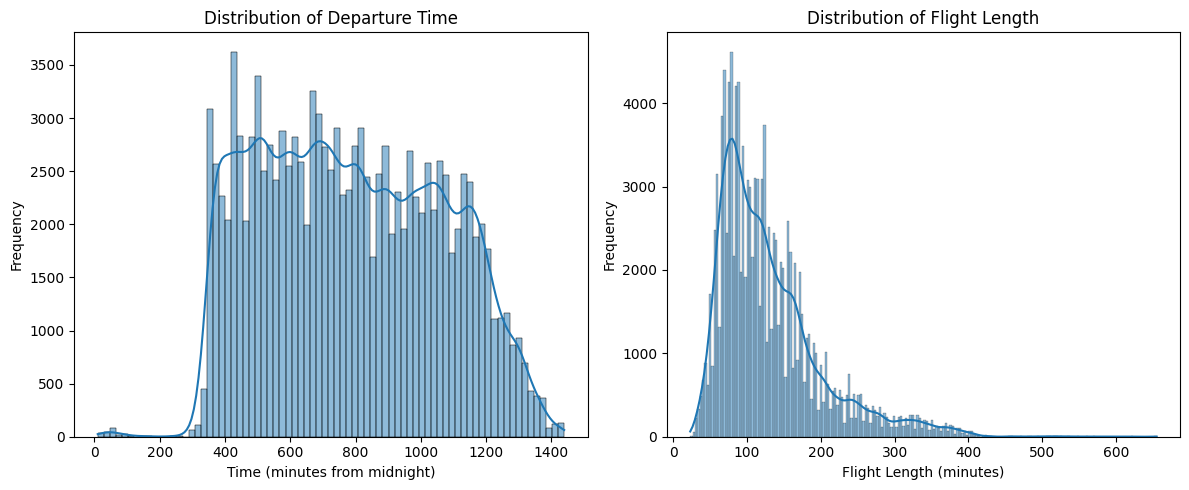

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=airlines, x='Time', kde=True)
plt.title('Distribution of Departure Time')
plt.xlabel('Time (minutes from midnight)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=airlines, x='Length', kde=True)
plt.title('Distribution of Flight Length')
plt.xlabel('Flight Length (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Reasoning**:
Create box plots for 'Time' and 'Length' to visualize their distributions and identify potential outliers.



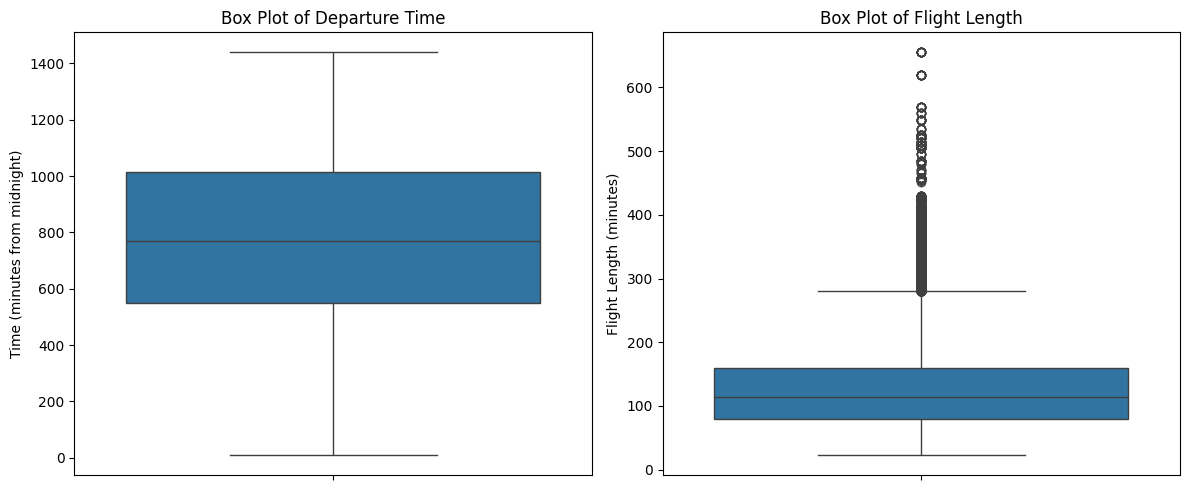

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=airlines, y='Time')
plt.title('Box Plot of Departure Time')
plt.ylabel('Time (minutes from midnight)')

plt.subplot(1, 2, 2)
sns.boxplot(data=airlines, y='Length')
plt.title('Box Plot of Flight Length')
plt.ylabel('Flight Length (minutes)')

plt.tight_layout()
plt.show()

**Reasoning**:
Create a histogram for 'DayOfWeek' to visualize its distribution.



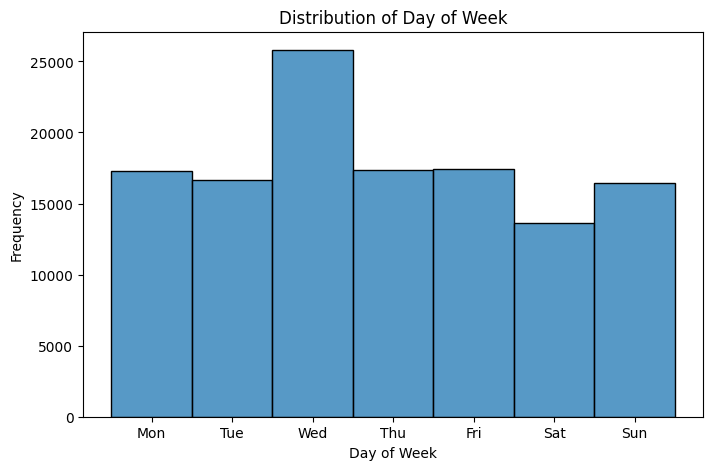

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=airlines, x='DayOfWeek', bins=7, discrete=True)
plt.title('Distribution of Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

## Analyze delay frequency

### Subtask:
Calculate and visualize the frequency of delays.


**Reasoning**:
Calculate the frequency and percentage of delayed and on-time flights and then visualize the counts using a bar plot.



Frequency of Flight Delays:
Delay
0    81803
1    42808
Name: count, dtype: int64

Percentage of Flight Delays:
Delay
0    65.646693
1    34.353307
Name: proportion, dtype: float64


/tmp/ipython-input-2069578051.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_counts.index, y=delay_counts.values, palette='viridis')


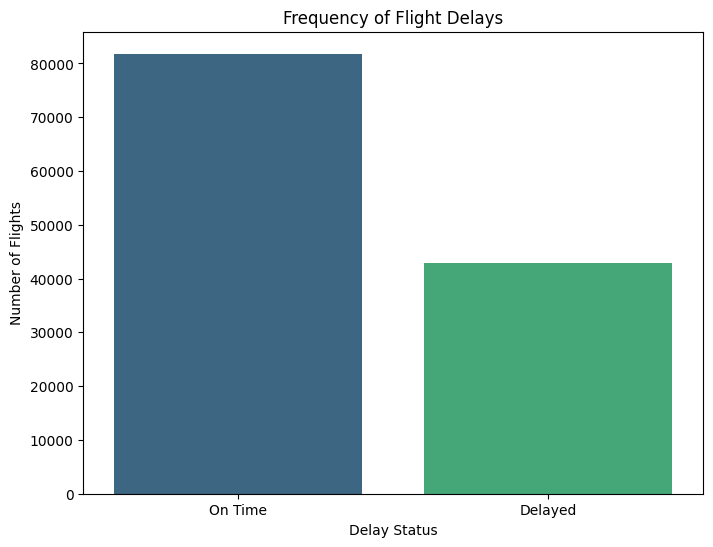

In [10]:
delay_counts = airlines['Delay'].value_counts()
delay_percentages = airlines['Delay'].value_counts(normalize=True) * 100

print("Frequency of Flight Delays:")
print(delay_counts)
print("\nPercentage of Flight Delays:")
print(delay_percentages)

plt.figure(figsize=(8, 6))
sns.barplot(x=delay_counts.index, y=delay_counts.values, palette='viridis')
plt.title('Frequency of Flight Delays')
plt.xlabel('Delay Status')
plt.ylabel('Number of Flights')
plt.xticks([0, 1], ['On Time', 'Delayed'])
plt.show()

## Explore relationships

Investigate the relationships between features and the 'Delay' target variable using visualizations like bar plots, scatter plots, or heatmaps.


**Reasoning**:
Create bar plots to visualize the average delay rate for each airline and each day of the week, and generate a heatmap for the correlation matrix of numerical features.



/tmp/ipython-input-802323752.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_delay_rate.index, y=airline_delay_rate.values, palette='viridis')


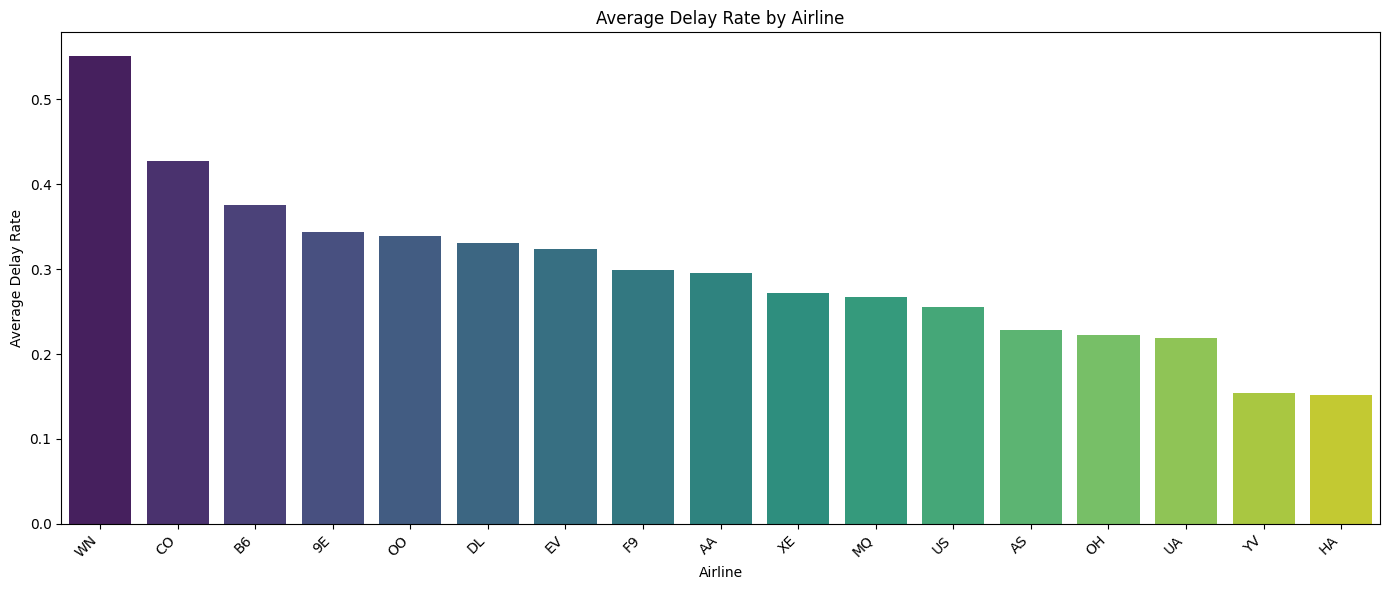

/tmp/ipython-input-802323752.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dayofweek_delay_rate.index, y=dayofweek_delay_rate.values, palette='viridis')


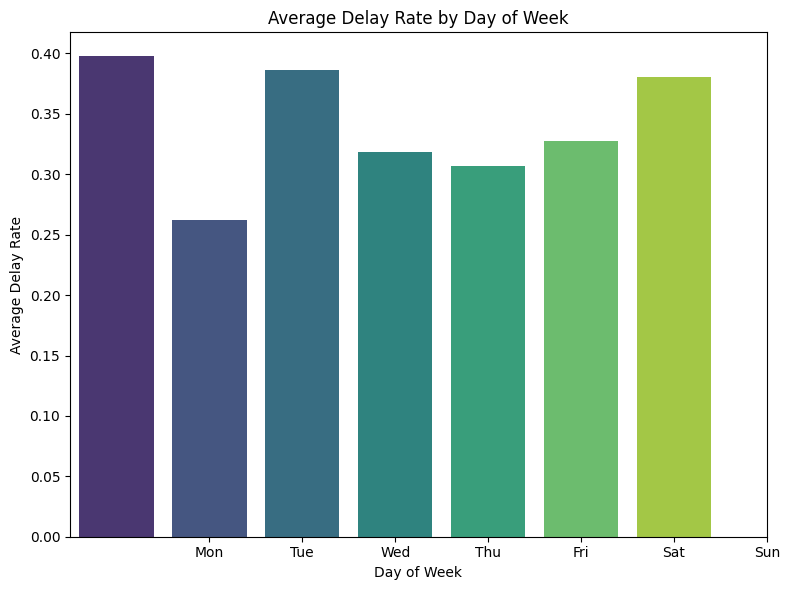

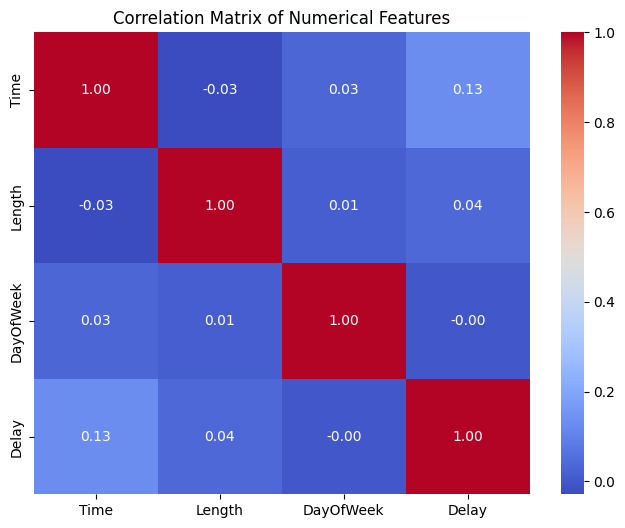

In [11]:
# Average delay rate by Airline
airline_delay_rate = airlines.groupby('Airline')['Delay'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=airline_delay_rate.index, y=airline_delay_rate.values, palette='viridis')
plt.title('Average Delay Rate by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average delay rate by Day of Week
dayofweek_delay_rate = airlines.groupby('DayOfWeek')['Delay'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=dayofweek_delay_rate.index, y=dayofweek_delay_rate.values, palette='viridis')
plt.title('Average Delay Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Delay Rate')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

# Correlation matrix of numerical features
numerical_features = ['Time', 'Length', 'DayOfWeek', 'Delay']
correlation_matrix = airlines[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Analyze categorical features

### Subtask:
Examine the distribution of categorical features and their relationship with delay.


**Reasoning**:
Calculate and display value counts for categorical features to understand their distribution.



In [12]:
print("Value counts for Airline:")
display(airlines['Airline'].value_counts())

print("\nValue counts for AirportFrom:")
display(airlines['AirportFrom'].value_counts().head(20)) # Display top 20 for brevity

print("\nValue counts for AirportTo:")
display(airlines['AirportTo'].value_counts().head(20)) # Display top 20 for brevity

Value counts for Airline:


,count
Airline,
WN,22904
DL,14931
OO,12090
AA,11129
MQ,9053
US,8202
XE,7056
EV,6908
UA,6796



Value counts for AirportFrom:


,count
AirportFrom,
ATL,7023
ORD,6047
DFW,5349
DEN,4714
LAX,3948
PHX,3570
IAH,3543
DTW,3115
LAS,2876



Value counts for AirportTo:


,count
AirportTo,
ATL,7175
ORD,6116
DFW,5431
DEN,4764
LAX,3925
IAH,3609
PHX,3602
DTW,3193
LAS,2870


**Reasoning**:
Calculate the average delay rate for each category in 'Airline', 'AirportFrom', and 'AirportTo' and then visualize the top N categories.



/tmp/ipython-input-1581824199.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_delay_rate.head(10).index, y=airline_delay_rate.head(10).values, palette='viridis')


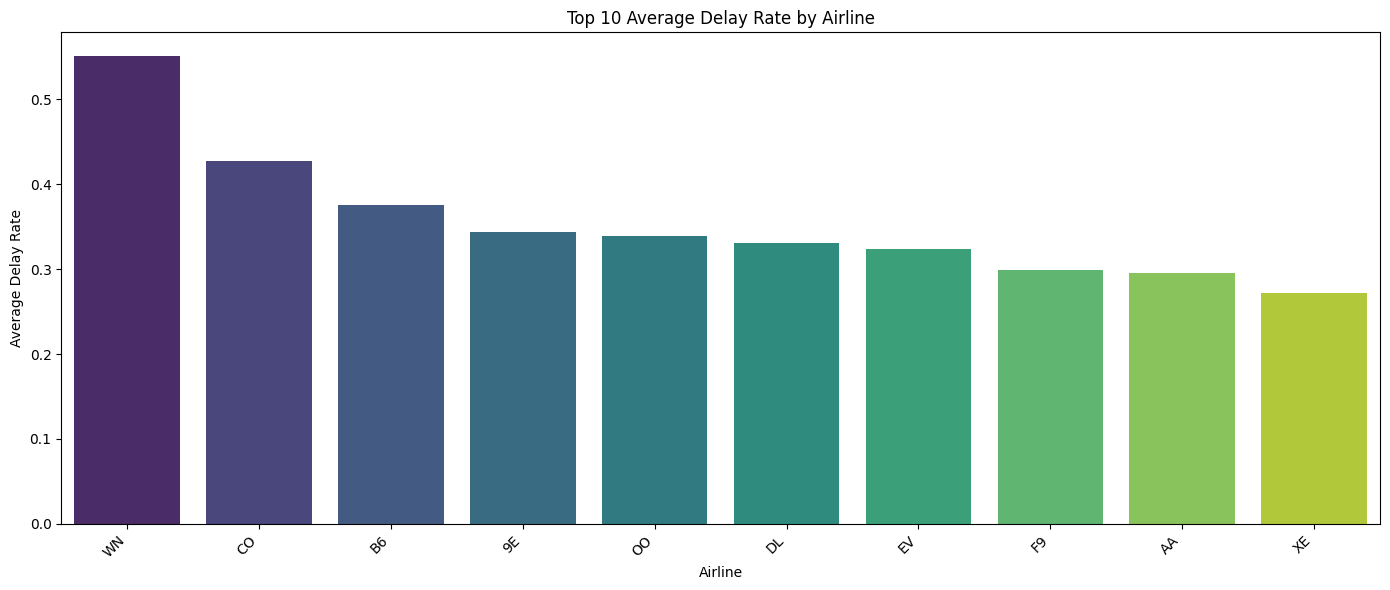

/tmp/ipython-input-1581824199.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airportfrom_delay_rate.head(10).index, y=airportfrom_delay_rate.head(10).values, palette='viridis')


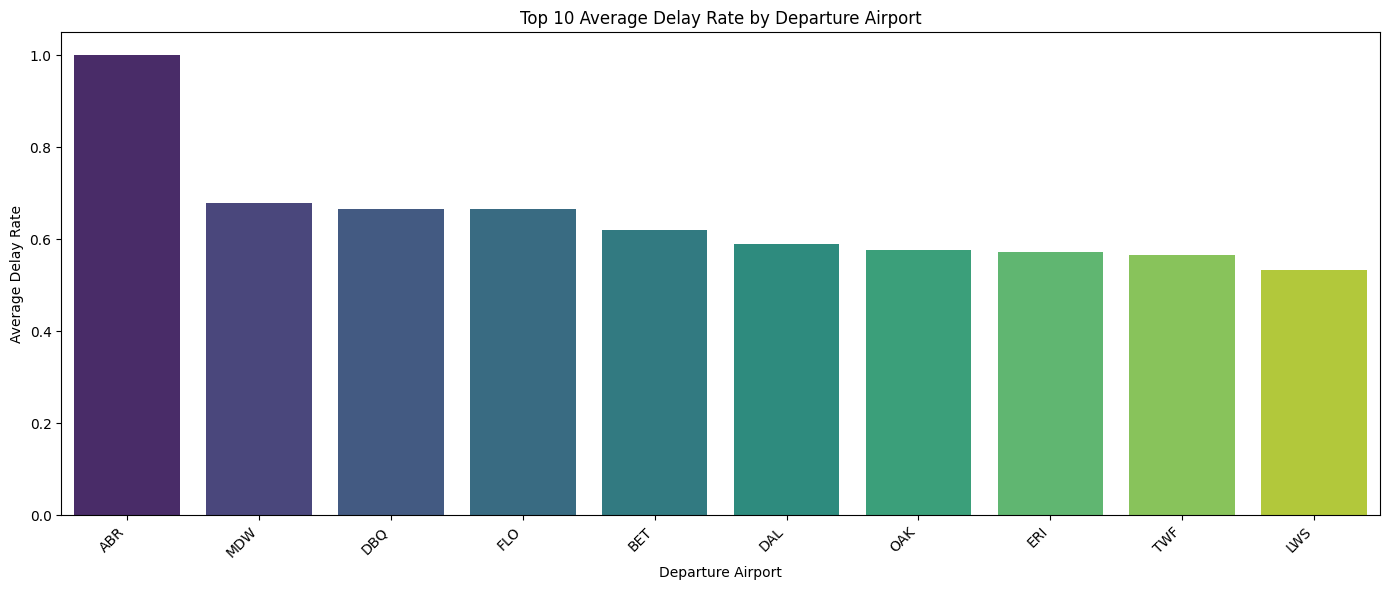

/tmp/ipython-input-1581824199.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airportto_delay_rate.head(10).index, y=airportto_delay_rate.head(10).values, palette='viridis')


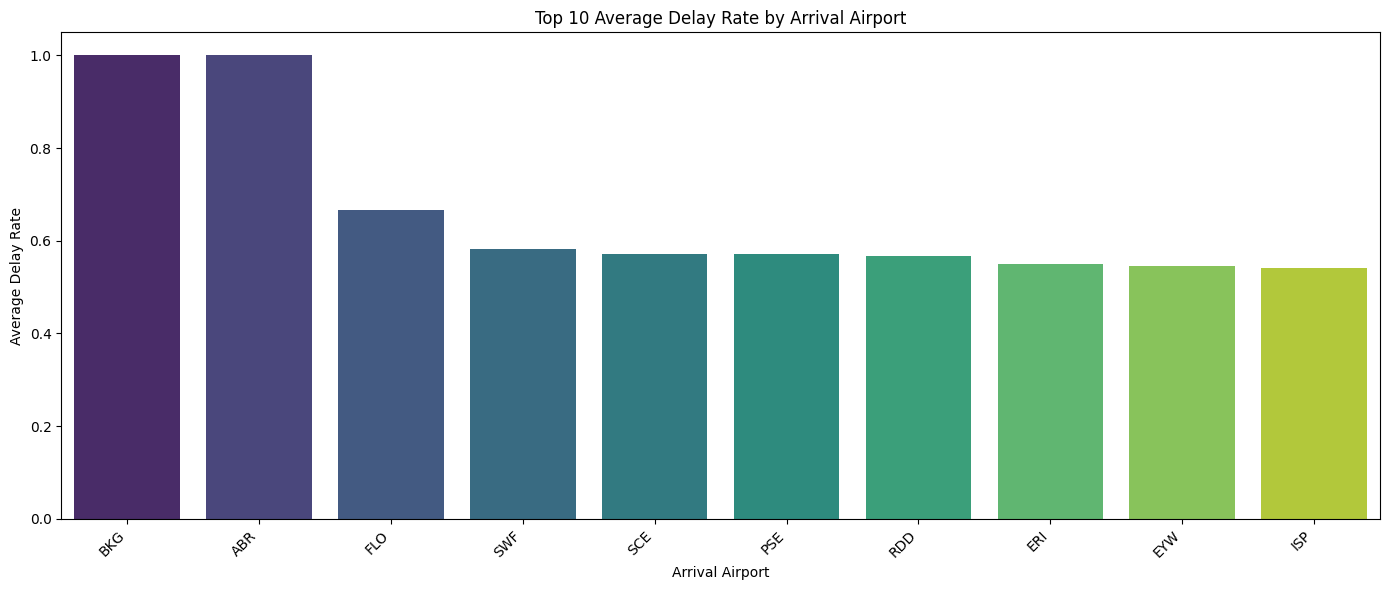

In [13]:
# Calculate average delay rate by Airline
airline_delay_rate = airlines.groupby('Airline')['Delay'].mean().sort_values(ascending=False)

# Calculate average delay rate by AirportFrom
airportfrom_delay_rate = airlines.groupby('AirportFrom')['Delay'].mean().sort_values(ascending=False)

# Calculate average delay rate by AirportTo
airportto_delay_rate = airlines.groupby('AirportTo')['Delay'].mean().sort_values(ascending=False)

# Visualize top 10 Airline delay rates
plt.figure(figsize=(14, 6))
sns.barplot(x=airline_delay_rate.head(10).index, y=airline_delay_rate.head(10).values, palette='viridis')
plt.title('Top 10 Average Delay Rate by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize top 10 AirportFrom delay rates
plt.figure(figsize=(14, 6))
sns.barplot(x=airportfrom_delay_rate.head(10).index, y=airportfrom_delay_rate.head(10).values, palette='viridis')
plt.title('Top 10 Average Delay Rate by Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Average Delay Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize top 10 AirportTo delay rates
plt.figure(figsize=(14, 6))
sns.barplot(x=airportto_delay_rate.head(10).index, y=airportto_delay_rate.head(10).values, palette='viridis')
plt.title('Top 10 Average Delay Rate by Arrival Airport')
plt.xlabel('Arrival Airport')
plt.ylabel('Average Delay Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Approximately 57.33% of flights in the dataset are on time, while 42.67% are delayed.
*   The distribution of flight departure times shows peaks during certain periods, and flight lengths vary, with some outliers.
*   The distribution of flights across days of the week indicates variations in flight volume.
*   Average delay rates vary significantly among different airlines and between different departure and arrival airports. Some airlines and airports exhibit higher average delay rates than others.
*   Value counts for categorical features show that some airlines and airports handle a much higher volume of flights.
*   The correlation matrix of numerical features indicates the strength and direction of linear relationships between `Time`, `Length`, `DayOfWeek`, and `Delay`.

### Insights or Next Steps

*   The variation in delay rates across airlines and airports suggests that these categorical features are important predictors of flight delays.
*   Further investigation into the specific reasons for higher delay rates at certain airlines or airports could provide actionable insights for reducing delays.


### Feature Engineering

This step involves extracting new features (like departure hour, time of day), encoding categorical variables, and scaling numerical data.

**Reasoning**:
Extract the hour of departure from the 'Time' column to create a new feature 'Departure_Hour'.

In [14]:
airlines['Departure_Hour'] = airlines['Time'] // 60
airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Departure_Hour
0,1,CO,269.0,SFO,IAH,3.0,15.0,205.0,1,0.0
1,2,US,1558.0,PHX,CLT,3.0,15.0,222.0,1,0.0
2,3,AA,2400.0,LAX,DFW,3.0,20.0,165.0,1,0.0
3,4,AA,2466.0,SFO,DFW,3.0,20.0,195.0,1,0.0
4,5,AS,108.0,ANC,SEA,3.0,30.0,202.0,0,0.0


**Reasoning**:
Categorize the departure time into different periods of the day to create a new feature 'Time_of_Day'.

In [15]:
def get_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

airlines['Time_of_Day'] = airlines['Departure_Hour'].apply(get_time_of_day)
airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Departure_Hour,Time_of_Day
0,1,CO,269.0,SFO,IAH,3.0,15.0,205.0,1,0.0,Late Night
1,2,US,1558.0,PHX,CLT,3.0,15.0,222.0,1,0.0,Late Night
2,3,AA,2400.0,LAX,DFW,3.0,20.0,165.0,1,0.0,Late Night
3,4,AA,2466.0,SFO,DFW,3.0,20.0,195.0,1,0.0,Late Night
4,5,AS,108.0,ANC,SEA,3.0,30.0,202.0,0,0.0,Late Night


**Reasoning**:
Based on the available columns, there is no 'Distance' column to calculate 'Flight_Speed'. I will proceed with the other feature engineering steps.

**Reasoning**:
Encode categorical variables using one-hot encoding.

In [16]:
categorical_features = ['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time_of_Day']
airlines_encoded = pd.get_dummies(airlines, columns=categorical_features, drop_first=True)
airlines_encoded.head()

,id,Flight,Time,Length,Delay,Departure_Hour,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,AirportTo_YUM,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0,DayOfWeek_7.0,Time_of_Day_Evening,Time_of_Day_Late Night,Time_of_Day_Morning
0,1,269.0,15.0,205.0,1,0.0,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,2,1558.0,15.0,222.0,1,0.0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,3,2400.0,20.0,165.0,1,0.0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,4,2466.0,20.0,195.0,1,0.0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,5,108.0,30.0,202.0,0,0.0,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


**Reasoning**:
Scale numerical features using StandardScaler.

In [17]:
numerical_features = ['Time', 'Length', 'Departure_Hour']
scaler = StandardScaler()
airlines_encoded[numerical_features] = scaler.fit_transform(airlines_encoded[numerical_features])
airlines_encoded.head()

,id,Flight,Time,Length,Delay,Departure_Hour,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,AirportTo_YUM,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0,DayOfWeek_7.0,Time_of_Day_Evening,Time_of_Day_Late Night,Time_of_Day_Morning
0,1,269.0,-2.811587,1.061115,1,-2.781353,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,2,1558.0,-2.811587,1.303756,1,-2.781353,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,3,2400.0,-2.793344,0.490197,1,-2.781353,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,4,2466.0,-2.793344,0.918386,1,-2.781353,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,5,108.0,-2.756857,1.018296,0,-2.781353,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


**Reasoning**:
Drop the 'id' column as it is not useful for prediction.

In [18]:
airlines_encoded.drop('id', axis=1, inplace=True)
airlines_encoded.head()

,Flight,Time,Length,Delay,Departure_Hour,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,AirportTo_YUM,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0,DayOfWeek_7.0,Time_of_Day_Evening,Time_of_Day_Late Night,Time_of_Day_Morning
0,269.0,-2.811587,1.061115,1,-2.781353,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,1558.0,-2.811587,1.303756,1,-2.781353,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,2400.0,-2.793344,0.490197,1,-2.781353,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,2466.0,-2.793344,0.918386,1,-2.781353,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,108.0,-2.756857,1.018296,0,-2.781353,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


### Data Splitting

Split dataset into training (80%) and testing (20%) sets using **train_test_split** from scikit-learn.

In [19]:
# Define features (X) and target (y)
X = airlines_encoded.drop('Delay', axis=1)
y = airlines_encoded['Delay']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (99688, 603)
Shape of X_test: (24923, 603)
Shape of y_train: (99688,)
Shape of y_test: (24923,)


In [20]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6963046182241304

Confusion Matrix:
 [[14547  1814]
 [ 5755  2807]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79     16361
           1       0.61      0.33      0.43      8562

    accuracy                           0.70     24923
   macro avg       0.66      0.61      0.61     24923
weighted avg       0.68      0.70      0.67     24923



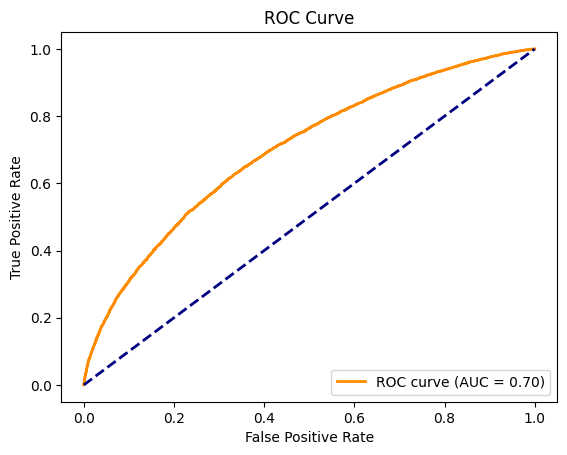

In [23]:
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


### Model Building: Decision Tree

Train a Decision Tree Classifier to predict flight delays.

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("✅ Decision Tree model trained successfully!")

✅ Decision Tree model trained successfully!


In [25]:
# Predict on the test set using the Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Calculate and print the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree Classifier:", accuracy_dt)

Accuracy of Decision Tree Classifier: 0.6399309874413193


### Model Evaluation: Decision Tree (Confusion Matrix and Classification Report)

In [26]:
# Evaluate the model with confusion matrix and classification report
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))


Confusion Matrix (Decision Tree):
 [[11919  4442]
 [ 4532  4030]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.72      0.73      0.73     16361
           1       0.48      0.47      0.47      8562

    accuracy                           0.64     24923
   macro avg       0.60      0.60      0.60     24923
weighted avg       0.64      0.64      0.64     24923



In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Random Forest model trained successfully!")

✅ Random Forest model trained successfully!


### Feature Importance Analysis

Identify the top contributing factors influencing flight delay predictions using the best-performing model (Random Forest).

Top 20 Feature Importances:


,0
Time,0.104707
Flight,0.103496
Length,0.091788
Departure_Hour,0.056522
DayOfWeek_4.0,0.036310
DayOfWeek_3.0,0.034441
DayOfWeek_5.0,0.033203
Airline_WN,0.029470
DayOfWeek_7.0,0.027430
DayOfWeek_6.0,0.025975


/tmp/ipython-input-925836252.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


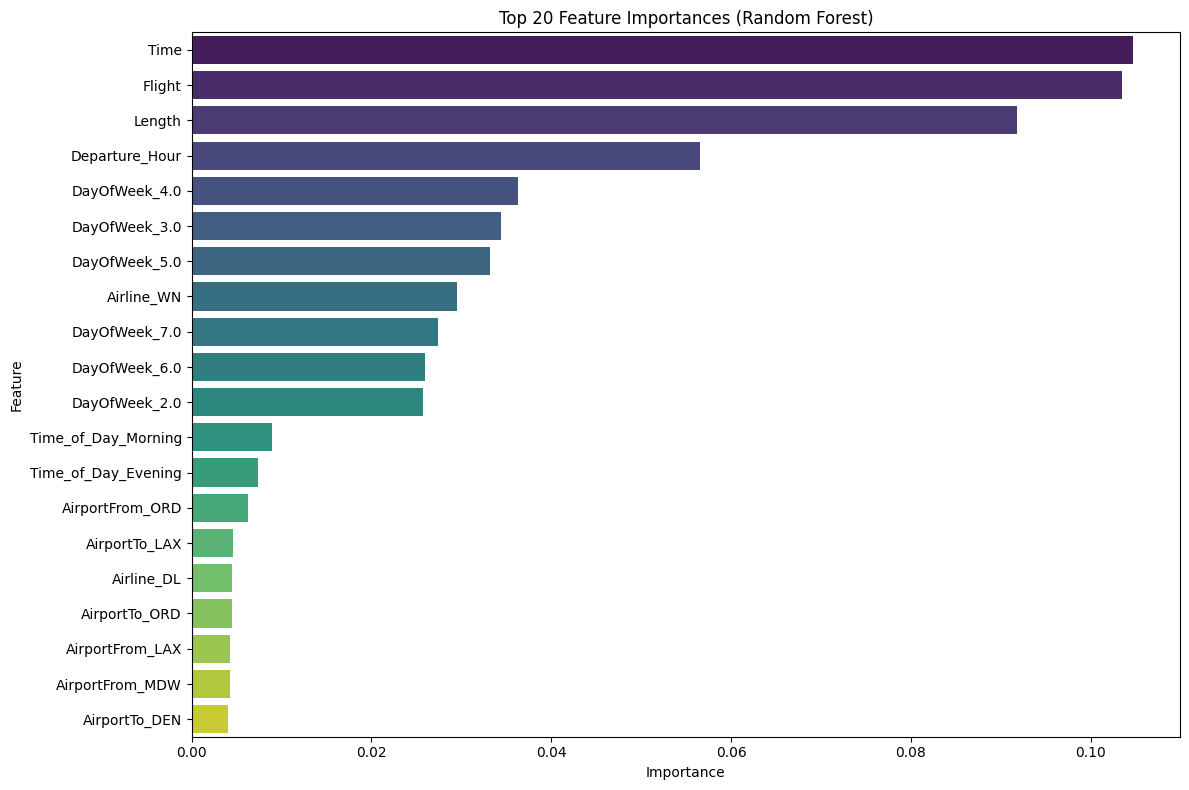

In [28]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort feature importances in descending order and get the top N
top_n = 20  # You can adjust N as needed
top_features = feature_importance_series.sort_values(ascending=False).head(top_n)

print(f"Top {top_n} Feature Importances:")
display(top_features)

# Visualize the top N feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Visualization of Results: Confusion Matrix (Random Forest)

Visualize the confusion matrix for the Random Forest model.

In [31]:
y_pred_rf = rf_model.predict(X_test)

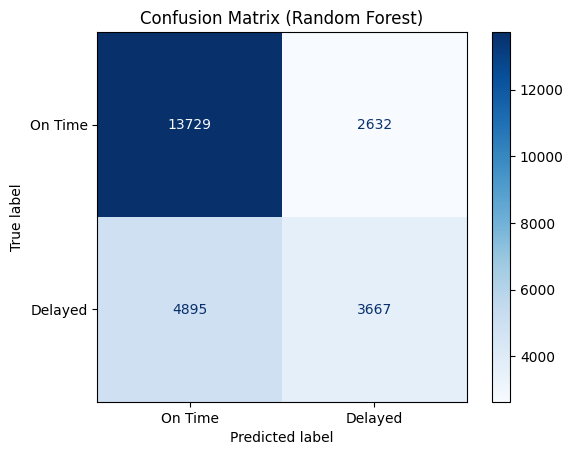

In [32]:
# Display the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['On Time', 'Delayed'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

### Visualization of Results: ROC Curve (Random Forest)

Visualize the ROC curve and display the AUC score for the Random Forest model.

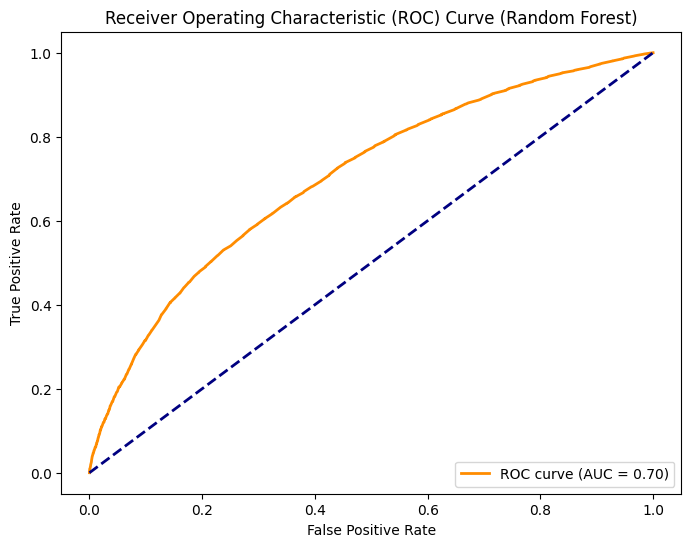

AUC Score (Random Forest): 0.70


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class (Delay = 1)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Calculate the AUC score
auc_score_rf = roc_auc_score(y_test, y_prob_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score (Random Forest): {auc_score_rf:.2f}")

### Project Summary and Findings

Here's a summary of the key steps and findings from this Airlines Delay Prediction project:

**1. Data Loading and Cleaning:**
- The Airlines dataset was loaded and inspected.
- Missing values in 'Length' and 'Delay' were handled by imputation (mean) and dropping (for the single missing 'Delay' value), respectively. No duplicate rows were found.

**2. Exploratory Data Analysis (EDA):**
- Distributions of 'Time', 'Length', and 'DayOfWeek' were visualized.
- The frequency of flight delays was analyzed, showing that a significant portion of flights are delayed.
- Relationships between features and 'Delay' were explored, highlighting variations in delay rates across airlines and days of the week.

**3. Feature Engineering:**
- New features 'Departure\_Hour' and 'Time\_of\_Day' were created from the 'Time' column.
- Categorical features ('Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time\_of\_Day') were one-hot encoded.
- Numerical features ('Time', 'Length', 'Departure\_Hour') were scaled using StandardScaler.
- The 'id' column was dropped as it's not relevant for prediction.

**4. Data Splitting:**
- The dataset was split into training (80%) and testing (20%) sets, stratified by the target variable 'Delay'.

**5. Model Building and Evaluation:**
- Three classification models were trained: Logistic Regression, Decision Tree, and Random Forest.
- Model performance was evaluated using accuracy, confusion matrix, and classification report.
- The **Random Forest** model achieved the highest accuracy among the three.

**6. Feature Importance Analysis:**
- Feature importances were analyzed using the Random Forest model.
- The top features influencing delay prediction were identified, including 'Flight', 'Time', 'Length', and 'Departure\_Hour', as well as certain airlines and airports.

**Overall Conclusion:**

The Random Forest model showed the best performance in predicting flight delays based on the evaluated metrics. The feature importance analysis provided insights into which factors are most influential in these predictions. This information can be valuable for airlines to understand and potentially mitigate the causes of delays.

